In [3]:
import osmnx as ox
import geopandas as gp

In [17]:
place_name = 'Brookline, Massachusetts'

mpo_boundary = gp.read_file("C:\GitHub\existing-inequities\output\AggregationAreas.gpkg", layer = "MPO_Boundary")
# mpo_boundary.plot()
print(mpo_boundary.is_valid)

0    True
dtype: bool


In [15]:
G_drive_region = ox.graph_from_polygon(mpo_boundary, network_type = 'drive')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

C:\Users\edomanico\miniconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


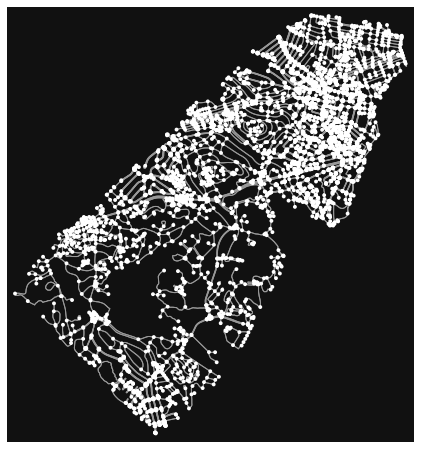

C:\Users\edomanico\miniconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


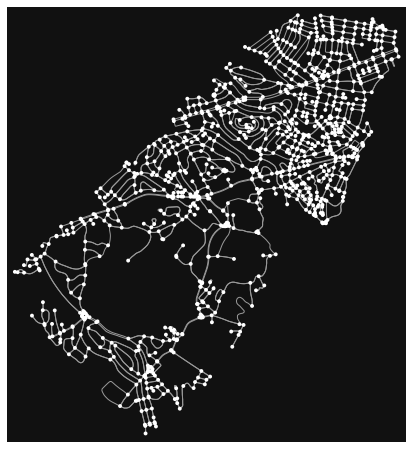

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [7]:
G_walk = ox.graph_from_place(place_name, network_type='walk')
ox.plot_graph(G_walk)

G_drive = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(G_drive)

C:\Users\edomanico\miniconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
C:\Users\edomanico\miniconda3\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\edomanico\miniconda3\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\edomanico\minicon

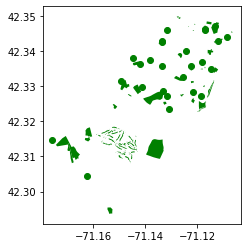

In [7]:
# List key-value pairs for tags
tags = {'leisure': 'park', 'landuse': 'grass'}
# Get the data
parks = ox.geometries_from_place(place_name, tags)
parks.plot(color="green");

In [8]:
ox.save_graph_geopackage(G_walk, "data/BrooklineOSMNetwork_walk.gpkg")
ox.save_graph_geopackage(G_drive, "data/BrooklineOSMNetwork_drive.gpkg")